In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [122]:
from sklearn.cluster import KMeans

In [132]:
import seaborn as sns

In [114]:
import warnings 
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv("E:\Stocks\Stocks.csv")

In [53]:
data.drop(["Unnamed: 0"],axis = 1 , inplace = True)

In [91]:
data.head()

,Stock_ID,Price,Volume,Market_Cap,P/E_Ratio
0,1,190.40,454814,3.318860e+10,40.00
1,2,475.60,984903,5.170152e+11,48.32
2,3,367.34,638475,1.966872e+11,19.56
3,4,301.34,897881,7.578465e+11,35.96
4,5,82.23,552972,6.412000e+11,16.61


In [67]:
# Apply rounding
data["Market_Cap"] = data["Market_Cap"].round(0)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Stock_ID    10000 non-null  int64  
 1   Price       10000 non-null  float64
 2   Volume      10000 non-null  int64  
 3   Market_Cap  10000 non-null  float64
 4   P/E_Ratio   10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [82]:
data["Market_Cap"] = data["Market_Cap"].apply(lambda x: round(x, 0))
print(data.head())

   Stock_ID   Price  Volume    Market_Cap  P/E_Ratio
0         1  190.40  454814  3.318860e+10      40.00
1         2  475.60  984903  5.170152e+11      48.32
2         3  367.34  638475  1.966872e+11      19.56
3         4  301.34  897881  7.578465e+11      35.96
4         5   82.23  552972  6.412000e+11      16.61


In [89]:
data.shape

(10000, 5)

Text(0.5, 1.0, 'Scatter Price vs Volume')

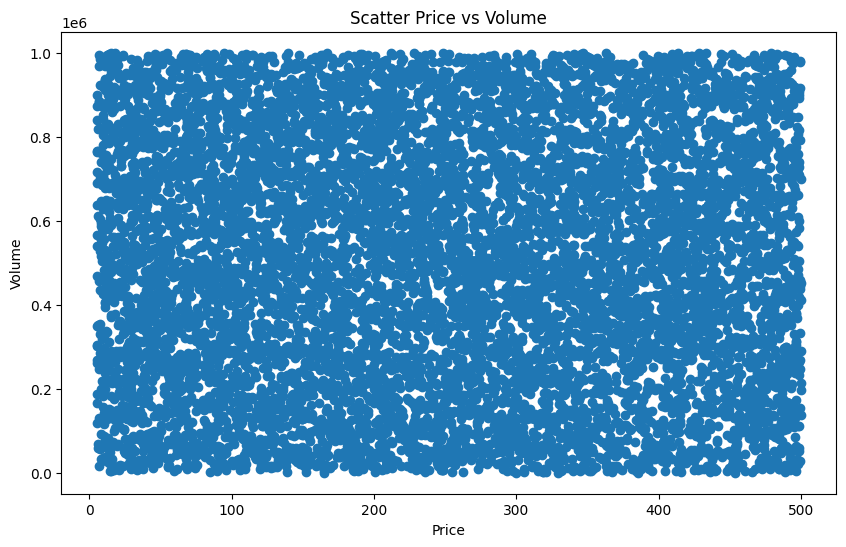

In [106]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Price'], data["Volume"])
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('Scatter Price vs Volume')

Text(0.5, 1.0, 'Scatter Price vs Market_Cap')

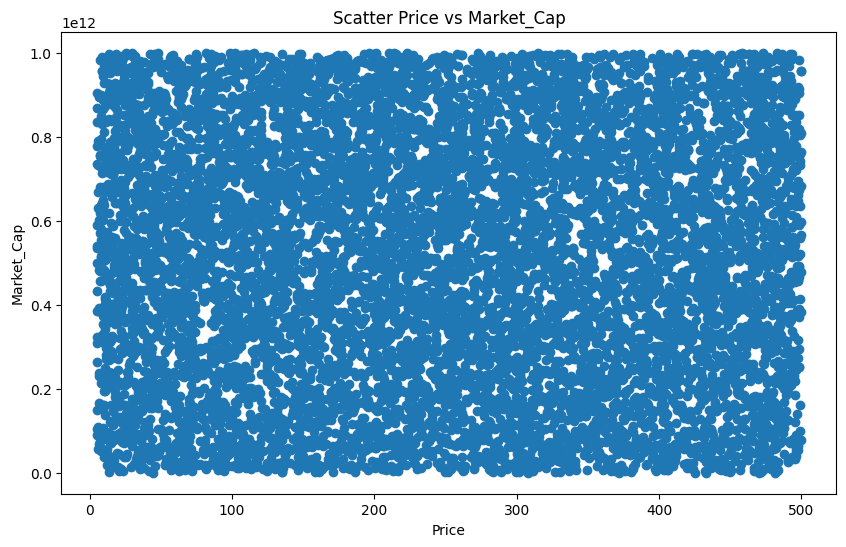

In [104]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Price'], data["Market_Cap"])
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Market_Cap')
plt.title('Scatter Price vs Market_Cap')

Text(0.5, 1.0, 'Scatter Price vs P/E_Ratio')

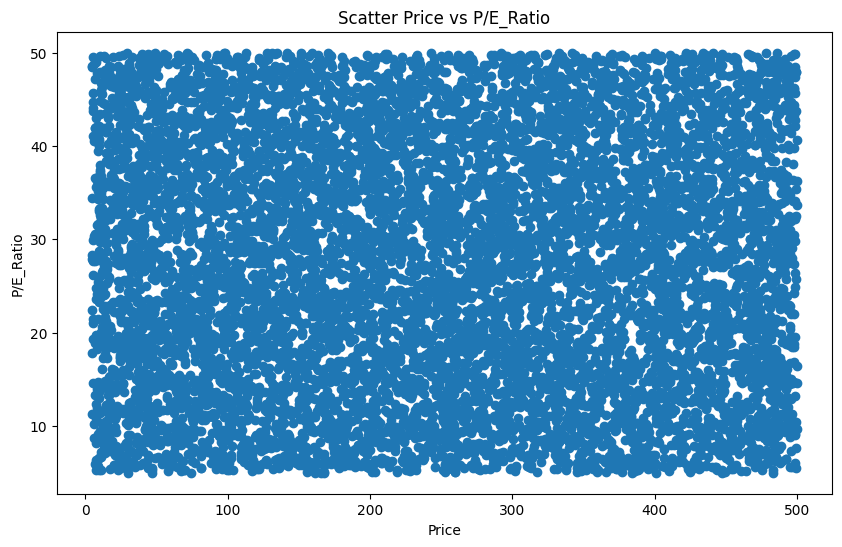

In [187]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Price'], data["P/E_Ratio"])
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('P/E_Ratio')
plt.title('Scatter Price vs P/E_Ratio')

In [108]:
data 

,Stock_ID,Price,Volume,Market_Cap,P/E_Ratio
0,1,190.40,454814,3.318860e+10,40.00
1,2,475.60,984903,5.170152e+11,48.32
2,3,367.34,638475,1.966872e+11,19.56
3,4,301.34,897881,7.578465e+11,35.96
4,5,82.23,552972,6.412000e+11,16.61
...,...,...,...,...,...
9995,9996,429.54,456919,2.423772e+11,21.93
9996,9997,449.27,666040,3.767600e+11,12.01
9997,9998,473.62,682066,5.406437e+11,42.59
9998,9999,201.76,211926,2.305677e+11,27.91


In [110]:
n_data = data.copy()

In [112]:
n_data

,Stock_ID,Price,Volume,Market_Cap,P/E_Ratio
0,1,190.40,454814,3.318860e+10,40.00
1,2,475.60,984903,5.170152e+11,48.32
2,3,367.34,638475,1.966872e+11,19.56
3,4,301.34,897881,7.578465e+11,35.96
4,5,82.23,552972,6.412000e+11,16.61
...,...,...,...,...,...
9995,9996,429.54,456919,2.423772e+11,21.93
9996,9997,449.27,666040,3.767600e+11,12.01
9997,9998,473.62,682066,5.406437e+11,42.59
9998,9999,201.76,211926,2.305677e+11,27.91


In [116]:
n_data.describe()

,Stock_ID,Price,Volume,Market_Cap,P/E_Ratio
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,5000.50000,249.609026,499956.807100,5.091821e+11,27.306501
std,2886.89568,142.376927,287851.880886,2.880944e+11,12.879420
min,1.00000,5.010000,1005.000000,4.912385e+07,5.000000
25%,2500.75000,126.930000,252164.750000,2.634741e+11,16.100000
50%,5000.50000,248.805000,500756.000000,5.145116e+11,27.350000
75%,7500.25000,371.300000,745336.000000,7.540031e+11,38.242500
max,10000.00000,499.860000,999982.000000,9.999248e+11,49.990000


In [120]:
#data.isnull().sum()

In [142]:
kmeans = KMeans()
kmeans.fit(n_data)

KMeans()

In [144]:
tsd = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(n_data)
    tsd.append(kmeans.inertia_)

tsd

[8.299006853519868e+26,
 2.1054901039726904e+26,
 9.420140046542044e+25,
 5.2515532940008725e+25,
 3.3174991989498183e+25,
 2.3092185057625493e+25,
 1.6972924253830048e+25,
 1.2978362903598966e+25,
 1.0302745446110608e+25,
 8.365619502915394e+24,
 6.89047464630742e+24]

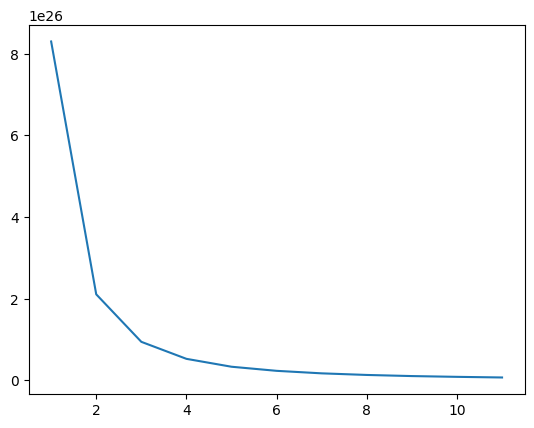

In [134]:
# Create a line plot
sns.lineplot(x = np.arange(1,12), y = tsd)

# Display the plot
plt.show()

In [146]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(n_data)
kmeans.inertia_

5.252413647785851e+25

In [148]:
kmeans.predict(n_data)

array([0, 2, 0, ..., 1, 0, 0])

In [150]:
clusters = kmeans.predict(n_data)

In [152]:
n_data["Clusters"] = clusters

In [154]:
n_data

,Stock_ID,Price,Volume,Market_Cap,P/E_Ratio,Clusters
0,1,190.40,454814,3.318860e+10,40.00,0
1,2,475.60,984903,5.170152e+11,48.32,2
2,3,367.34,638475,1.966872e+11,19.56,0
3,4,301.34,897881,7.578465e+11,35.96,1
4,5,82.23,552972,6.412000e+11,16.61,1
...,...,...,...,...,...,...
9995,9996,429.54,456919,2.423772e+11,21.93,0
9996,9997,449.27,666040,3.767600e+11,12.01,2
9997,9998,473.62,682066,5.406437e+11,42.59,1
9998,9999,201.76,211926,2.305677e+11,27.91,0


In [158]:
n_data["Clusters"].value_counts()

Clusters
2    2556
1    2550
0    2488
3    2406
Name: count, dtype: int64

Text(0.5, 1.0, 'Scatter Price vs Volume')

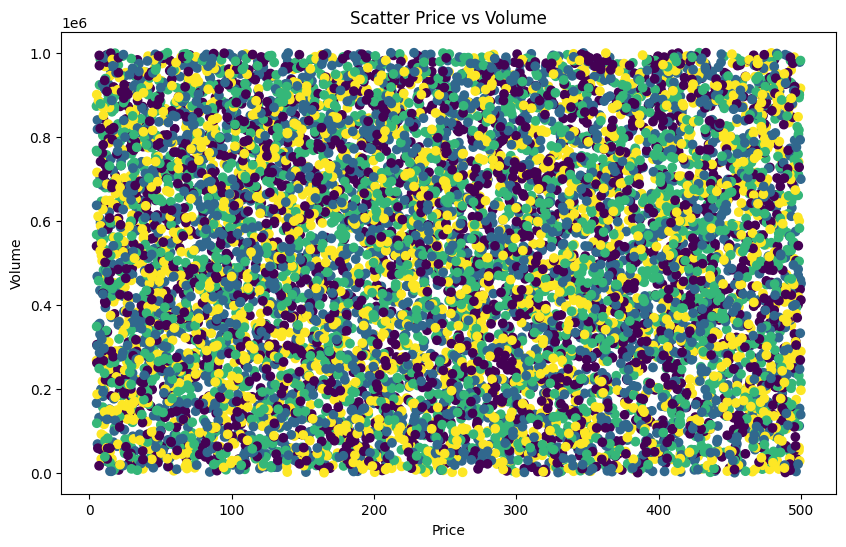

In [170]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(n_data['Price'], n_data["Volume"], c= n_data["Clusters"],cmap = "viridis")
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('Scatter Price vs Volume')

Text(0.5, 1.0, 'Scatter Price vs Market_Cap')

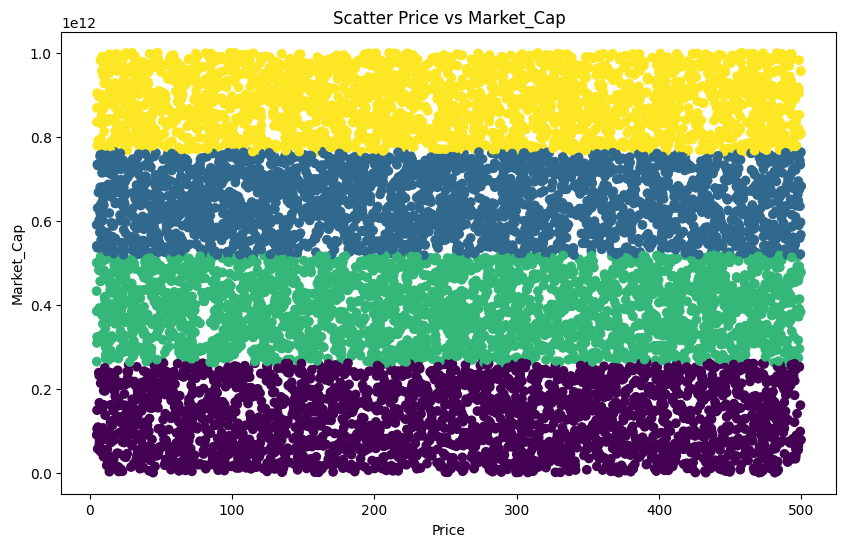

In [172]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(n_data['Price'], n_data["Market_Cap"],c= n_data["Clusters"],cmap = "viridis")
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Market_Cap')
plt.title('Scatter Price vs Market_Cap')

Text(0.5, 1.0, 'Scatter Price vs P/E_Ratio')

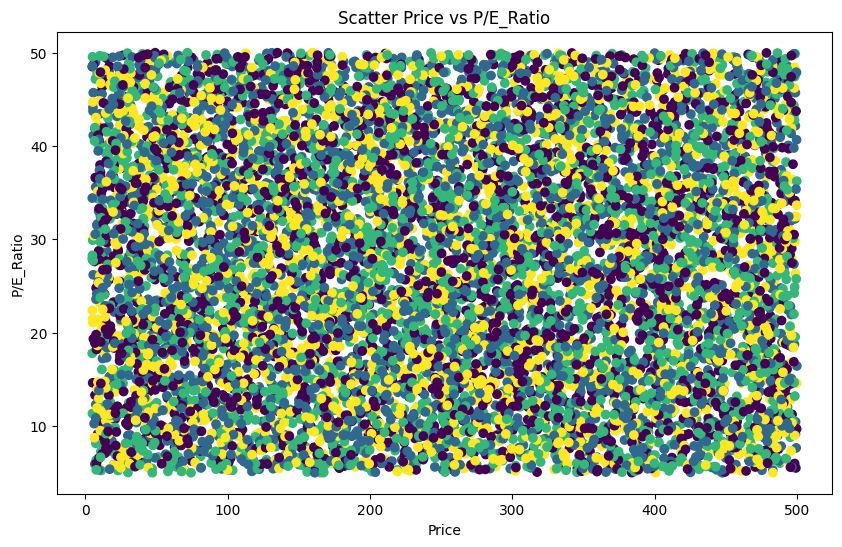

In [189]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(n_data['Price'], n_data["P/E_Ratio"],c= n_data["Clusters"],cmap = "viridis")
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('P/E_Ratio')
plt.title('Scatter Price vs P/E_Ratio')

__Silhouette Score:__

__Measures how similar a data point is to its own cluster compared to other clusters.
Values range from -1 to 1, where a higher value indicates better clustering.__

In [175]:
from sklearn.metrics import silhouette_score

# Assuming 'Clusters' is your clustering result
silhouette_avg = silhouette_score(n_data, n_data['Clusters'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5716081436433645


__Davies-Bouldin Index:__

__Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.__

In [180]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(n_data, n_data['Clusters'])
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.4993261560910349


__Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher values indicate better clustering.__

In [185]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(n_data, n_data['Clusters'])
print(f"Calinski-Harabasz Index: {ch_index}")

Calinski-Harabasz Index: 49316.87584084732
